><h2><center> Applied Machine Learning / Project 1
<h3><center>Ali Behroozfar (axb160531) <br><br> Payam Radmehr (pxr170001)
   
 <br><br>For the regression project, we chose a dataset which is about housing price in California. In this dataset, a lot of variables descibe the sale price and in this project we tried to find the best model to explain the sales prices using the variables availabe in the dataset. The dataset is available online and can be downloaded at this link:<br><br> https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing=pd.read_csv('train.csv')

In [3]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Choosing variables

In [4]:
housing1=housing[['MSZoning','LotArea','Utilities','LandSlope','BldgType','OverallCond','OverallQual','YearBuilt','Foundation','Heating','CentralAir','1stFlrSF','Fireplaces','BedroomAbvGr','TotRmsAbvGrd','WoodDeckSF','GarageArea','PoolArea','YrSold','GrLivArea']]
housing1_target=housing[['SalePrice']]

In [5]:
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
housing1.isnull().sum()

MSZoning        0
LotArea         0
Utilities       0
LandSlope       0
BldgType        0
OverallCond     0
OverallQual     0
YearBuilt       0
Foundation      0
Heating         0
CentralAir      0
1stFlrSF        0
Fireplaces      0
BedroomAbvGr    0
TotRmsAbvGrd    0
WoodDeckSF      0
GarageArea      0
PoolArea        0
YrSold          0
GrLivArea       0
dtype: int64

### Creating null values and imputing the null values by the mean values

In [6]:
nan_mat = np.random.random(housing1.shape)<0.05
nan_mat
nan_mat.sum()
housing1.shape
housing1_NaN = housing1.mask(nan_mat)
housing1_NaN.head()
housing1['GarageArea']=housing1_NaN['GarageArea']
housing1['LotArea']=housing1_NaN['LotArea']
housing1['TotRmsAbvGrd']=housing1_NaN['TotRmsAbvGrd']
housing1['GrLivArea']=housing1_NaN['GrLivArea']
housing1.head()

C:\Users\Alex\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Alex\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alex\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

,MSZoning,LotArea,Utilities,LandSlope,BldgType,OverallCond,OverallQual,YearBuilt,Foundation,Heating,CentralAir,1stFlrSF,Fireplaces,BedroomAbvGr,TotRmsAbvGrd,WoodDeckSF,GarageArea,PoolArea,YrSold,GrLivArea
0,RL,8450.0,AllPub,Gtl,1Fam,5,7,2003,PConc,GasA,Y,856,0,3,8.0,0,548.0,0,2008,1710.0
1,RL,9600.0,AllPub,Gtl,1Fam,8,6,1976,CBlock,GasA,Y,1262,1,3,6.0,298,460.0,0,2007,1262.0
2,RL,11250.0,AllPub,Gtl,1Fam,5,7,2001,PConc,GasA,Y,920,1,3,6.0,0,608.0,0,2008,1786.0
3,RL,NaN,AllPub,Gtl,1Fam,5,7,1915,BrkTil,GasA,Y,961,1,3,7.0,0,642.0,0,2006,1717.0
4,RL,14260.0,AllPub,Gtl,1Fam,5,8,2000,PConc,GasA,Y,1145,1,4,9.0,192,836.0,0,2008,2198.0


In [7]:
housing1.isnull().sum()


MSZoning         0
LotArea         66
Utilities        0
LandSlope        0
BldgType         0
OverallCond      0
OverallQual      0
YearBuilt        0
Foundation       0
Heating          0
CentralAir       0
1stFlrSF         0
Fireplaces       0
BedroomAbvGr     0
TotRmsAbvGrd    76
WoodDeckSF       0
GarageArea      72
PoolArea         0
YrSold           0
GrLivArea       78
dtype: int64

In [8]:
housing1=housing1.fillna(housing1.mean())


In [9]:
housing1.isnull().sum()

MSZoning        0
LotArea         0
Utilities       0
LandSlope       0
BldgType        0
OverallCond     0
OverallQual     0
YearBuilt       0
Foundation      0
Heating         0
CentralAir      0
1stFlrSF        0
Fireplaces      0
BedroomAbvGr    0
TotRmsAbvGrd    0
WoodDeckSF      0
GarageArea      0
PoolArea        0
YrSold          0
GrLivArea       0
dtype: int64

In [10]:
housing1.head()

,MSZoning,LotArea,Utilities,LandSlope,BldgType,OverallCond,OverallQual,YearBuilt,Foundation,Heating,CentralAir,1stFlrSF,Fireplaces,BedroomAbvGr,TotRmsAbvGrd,WoodDeckSF,GarageArea,PoolArea,YrSold,GrLivArea
0,RL,8450.000000,AllPub,Gtl,1Fam,5,7,2003,PConc,GasA,Y,856,0,3,8.0,0,548.0,0,2008,1710.0
1,RL,9600.000000,AllPub,Gtl,1Fam,8,6,1976,CBlock,GasA,Y,1262,1,3,6.0,298,460.0,0,2007,1262.0
2,RL,11250.000000,AllPub,Gtl,1Fam,5,7,2001,PConc,GasA,Y,920,1,3,6.0,0,608.0,0,2008,1786.0
3,RL,10553.953372,AllPub,Gtl,1Fam,5,7,1915,BrkTil,GasA,Y,961,1,3,7.0,0,642.0,0,2006,1717.0
4,RL,14260.000000,AllPub,Gtl,1Fam,5,8,2000,PConc,GasA,Y,1145,1,4,9.0,192,836.0,0,2008,2198.0


## Data visualization on the numerical values

###### Sales price is the target value. It has positive skewness.

## working on "Ground living area" variable

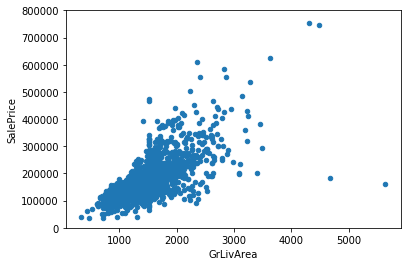

In [11]:
var = 'GrLivArea'
data1 = pd.concat([housing1_target, housing1], axis=1)
data1.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### After taking log :

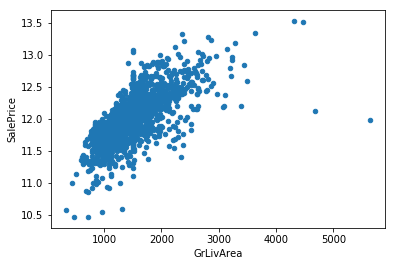

In [12]:
var = 'GrLivArea'
data3 = pd.concat([np.log(housing1_target['SalePrice']), housing1[var]], axis=1)
data3.plot.scatter(x=var, y='SalePrice');

## Removing the outliers:

In [14]:
data1.sort_values(by = 'GrLivArea', ascending = False)[:5]
data1 = data1.drop(data1[data1['GrLivArea'] == 5642.0].index)
data1 = data1.drop(data1[data1['GrLivArea'] == 4676.0].index)

## Plotting scatter diagram of the logged values after removing outliers:

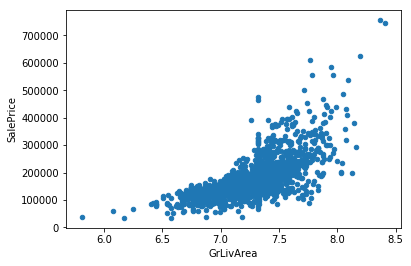

In [15]:
var = 'GrLivArea'
data1['GrLivArea']=np.log(data1['GrLivArea'])
data1.plot.scatter(x=var, y='SalePrice');

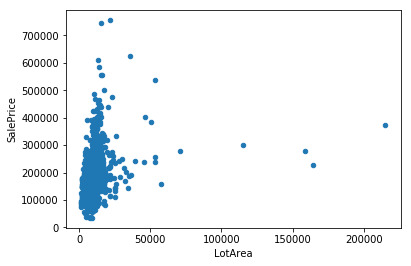

In [16]:
var = 'LotArea'
data1.plot.scatter(x=var, y='SalePrice');

### Removing two outliers (they dont make sense based on the graph)

In [17]:
#data1.head()
data1.sort_values(by = 'LotArea', ascending = False)[:3]
data1 = data1.drop(data1[data1['LotArea'] == 215245].index)
data1 = data1.drop(data1[data1['LotArea'] == 159000].index)
data1 = data1.drop(data1[data1['LotArea'] == 57200.0].index)

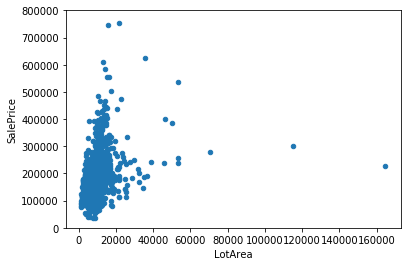

In [18]:
data1.plot.scatter(x='LotArea', y='SalePrice', ylim=(0,800000));

## Taking Log:

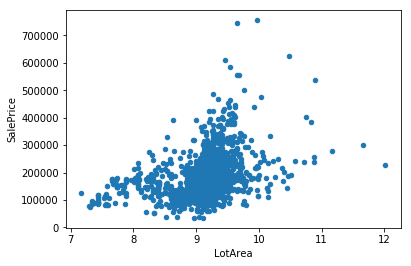

In [19]:
data1['LotArea']=np.log(data1['LotArea'])
data1.plot.scatter(x='LotArea', y='SalePrice');

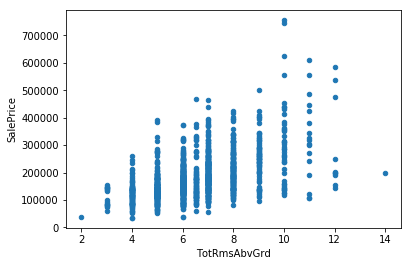

In [20]:
var = 'TotRmsAbvGrd'
data1.plot.scatter(x=var, y='SalePrice');

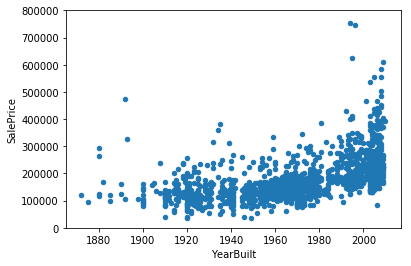

In [21]:
var = 'YearBuilt'
data1.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

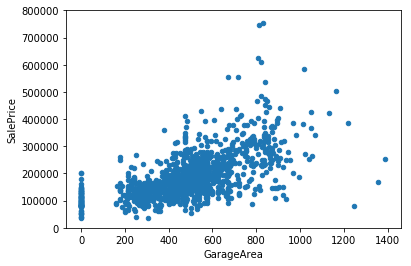

In [22]:
var = 'GarageArea'
data1.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [126]:
## Since Garage Area variable has some zero values, we dont take Log of this variale

In [23]:
housing1=data1
housing1.head()

,SalePrice,MSZoning,LotArea,Utilities,LandSlope,BldgType,OverallCond,OverallQual,YearBuilt,Foundation,...,CentralAir,1stFlrSF,Fireplaces,BedroomAbvGr,TotRmsAbvGrd,WoodDeckSF,GarageArea,PoolArea,YrSold,GrLivArea
0,208500,RL,9.041922,AllPub,Gtl,1Fam,5,7,2003,PConc,...,Y,856,0,3,8.0,0,548.0,0,2008,7.444249
1,181500,RL,9.169518,AllPub,Gtl,1Fam,8,6,1976,CBlock,...,Y,1262,1,3,6.0,298,460.0,0,2007,7.140453
2,223500,RL,9.328123,AllPub,Gtl,1Fam,5,7,2001,PConc,...,Y,920,1,3,6.0,0,608.0,0,2008,7.487734
3,140000,RL,9.264256,AllPub,Gtl,1Fam,5,7,1915,BrkTil,...,Y,961,1,3,7.0,0,642.0,0,2006,7.448334
4,250000,RL,9.565214,AllPub,Gtl,1Fam,5,8,2000,PConc,...,Y,1145,1,4,9.0,192,836.0,0,2008,7.695303


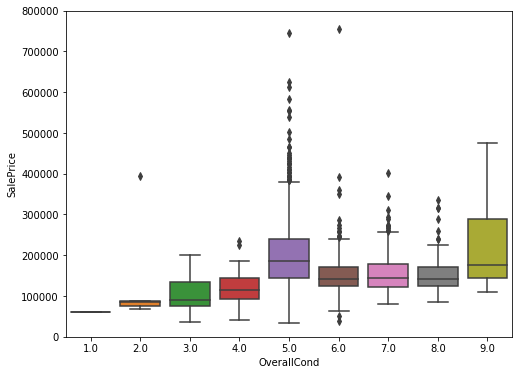

In [24]:
var = 'OverallCond'
data = pd.concat([housing1_target['SalePrice'], housing1[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

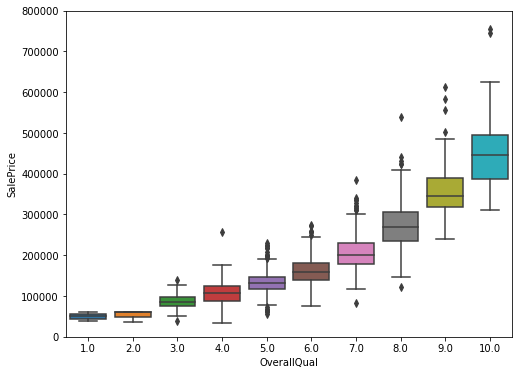

In [25]:
var = 'OverallQual'
data = pd.concat([housing1_target['SalePrice'], housing1[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

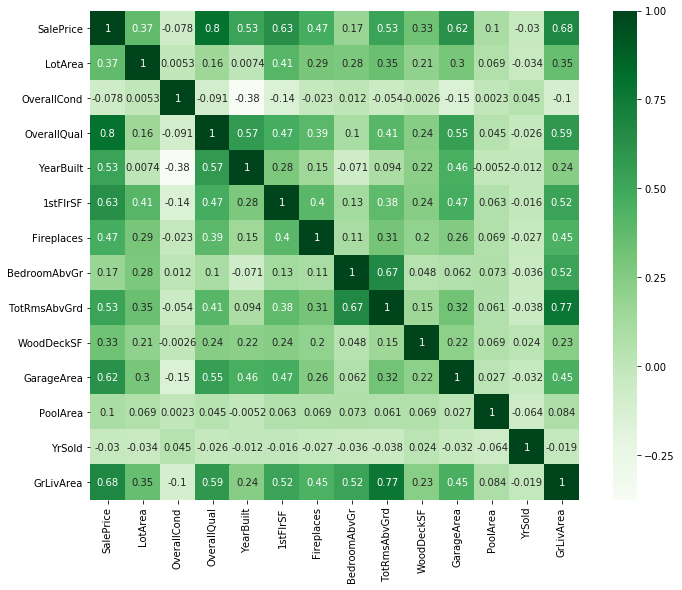

In [26]:
corrmat = housing1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="Greens", annot=True, square=True);

In [27]:
corrmat

,SalePrice,LotArea,OverallCond,OverallQual,YearBuilt,1stFlrSF,Fireplaces,BedroomAbvGr,TotRmsAbvGrd,WoodDeckSF,GarageArea,PoolArea,YrSold,GrLivArea
SalePrice,1.000000,0.371649,-0.078497,0.796929,0.525683,0.630585,0.468291,0.167390,0.526683,0.327540,0.618593,0.099896,-0.029687,0.681673
LotArea,0.371649,1.000000,0.005342,0.155171,0.007369,0.412012,0.293878,0.280714,0.347316,0.208631,0.299604,0.068931,-0.033721,0.352976
OverallCond,-0.078497,0.005342,1.000000,-0.090532,-0.375920,-0.144562,-0.022896,0.012013,-0.053698,-0.002552,-0.146047,0.002334,0.045328,-0.104598
OverallQual,0.796929,0.155171,-0.090532,1.000000,0.571393,0.470331,0.394833,0.101788,0.408256,0.236872,0.545878,0.044766,-0.026154,0.587573
YearBuilt,0.525683,0.007369,-0.375920,0.571393,1.000000,0.283446,0.147842,-0.070532,0.093933,0.223164,0.460305,-0.005234,-0.012460,0.238095
1stFlrSF,0.630585,0.412012,-0.144562,0.470331,0.283446,1.000000,0.398802,0.130107,0.381208,0.238594,0.470860,0.063133,-0.015598,0.522697
Fireplaces,0.468291,0.293878,-0.022896,0.394833,0.147842,0.398802,1.000000,0.105638,0.309379,0.202743,0.258097,0.069275,-0.027340,0.445844
BedroomAbvGr,0.167390,0.280714,0.012013,0.101788,-0.070532,0.130107,0.105638,1.000000,0.666105,0.047619,0.061801,0.073124,-0.035739,0.523801
TotRmsAbvGrd,0.526683,0.347316,-0.053698,0.408256,0.093933,0.381208,0.309379,0.666105,1.000000,0.154136,0.319366,0.060873,-0.038321,0.768249
WoodDeckSF,0.327540,0.208631,-0.002552,0.236872,0.223164,0.238594,0.202743,0.047619,0.154136,1.000000,0.219613,0.069041,0.023615,0.234733


##### The highest correlation is between "Overal Quality"  and "Sales price" and they have correlation of 0.8. So we dont remove any column from the dataset to prevent multicollinearity 

C:\Users\Alex\Anaconda3.7\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


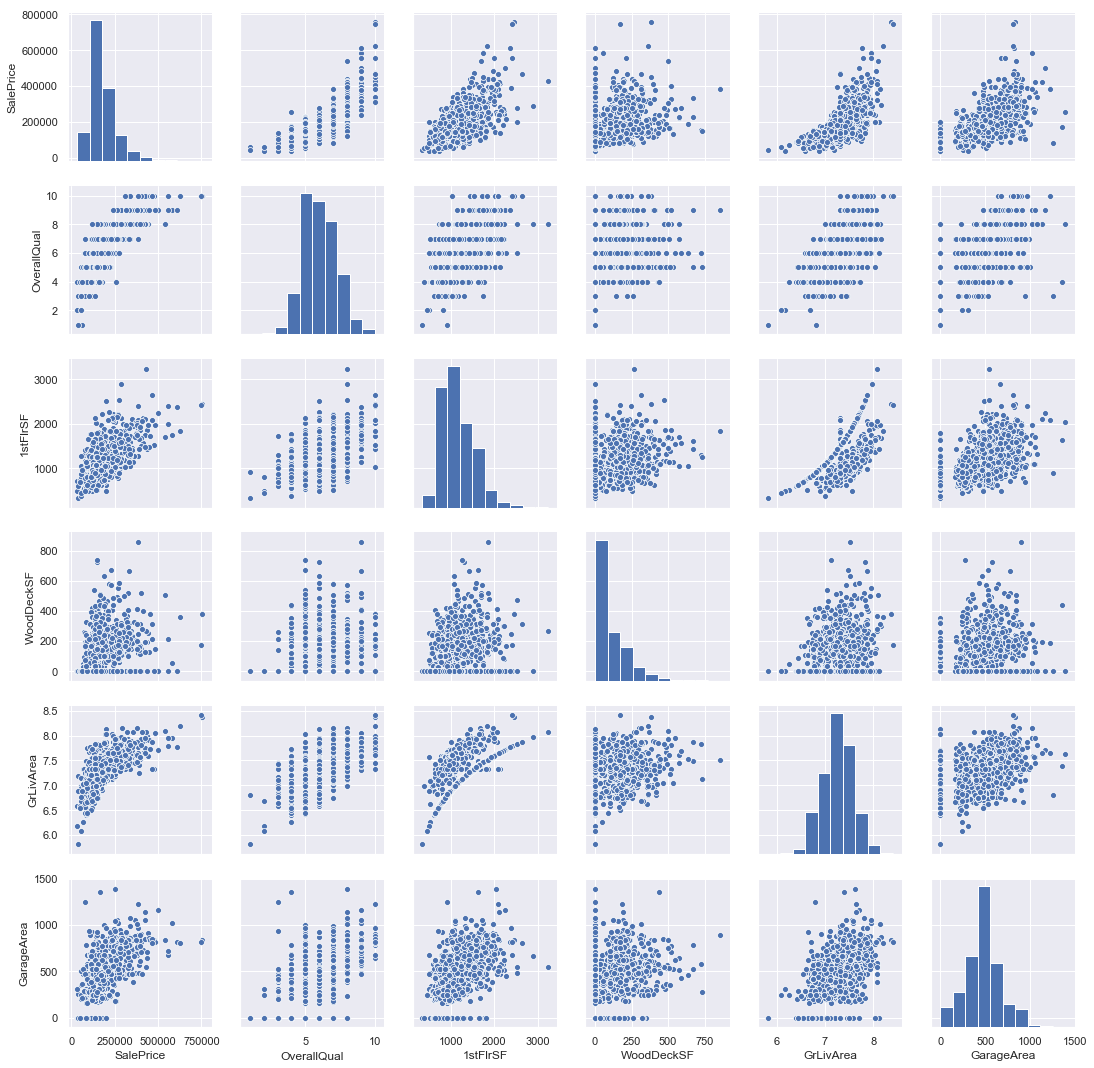

In [28]:
sns.set()
cols = ['SalePrice','Utilities','LandSlope','BldgType','OverallQual','Foundation','Heating','CentralAir','1stFlrSF','WoodDeckSF','GrLivArea','GarageArea']
sns.pairplot(housing1[cols], size = 2.5)
plt.show();
#from pandas.plotting import scatter_matrix 
#scatter_matrix(housing1[cols], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

### Converting categorical variables to dummy variables

In [29]:
housing1=pd.get_dummies(housing1,columns=['MSZoning'],prefix=['MSZoning'],drop_first=True)
housing1=pd.get_dummies(housing1,columns=['Utilities'],prefix=['Utilities'],drop_first=True)
housing1=pd.get_dummies(housing1,columns=['LandSlope'],prefix=['LandSlope'],drop_first=True)
housing1=pd.get_dummies(housing1,columns=['BldgType'],prefix=['BldgType'],drop_first=True)
housing1=pd.get_dummies(housing1,columns=['Foundation'],prefix=['Foundation'],drop_first=True)
housing1=pd.get_dummies(housing1,columns=['Heating'],prefix=['Heating'],drop_first=True)
housing1=pd.get_dummies(housing1,columns=['CentralAir'],prefix=['CentralAir'],drop_first=True)


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
housing1['OverallCond'] = le.fit_transform(housing1['OverallCond'])
housing1['OverallQual'] = le.fit_transform(housing1['OverallQual'])
housing1['YearBuilt'] = le.fit_transform(housing1['YearBuilt'])
housing1['BedroomAbvGr'] = le.fit_transform(housing1['BedroomAbvGr'])
housing1['YrSold'] = le.fit_transform(housing1['YrSold'])
housing1['TotRmsAbvGrd'] = le.fit_transform(housing1['TotRmsAbvGrd'])

In [31]:
housing1.head()

,SalePrice,LotArea,OverallCond,OverallQual,YearBuilt,1stFlrSF,Fireplaces,BedroomAbvGr,TotRmsAbvGrd,WoodDeckSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y
0,208500,9.041922,4,6,104,856,0,3,7,0,...,1,0,0,0,1,0,0,0,0,1
1,181500,9.169518,7,5,77,1262,1,3,4,298,...,0,0,0,0,1,0,0,0,0,1
2,223500,9.328123,4,6,102,920,1,3,4,0,...,1,0,0,0,1,0,0,0,0,1
3,140000,9.264256,4,6,19,961,1,3,6,0,...,0,0,0,0,1,0,0,0,0,1
4,250000,9.565214,4,7,101,1145,1,4,8,192,...,1,0,0,0,1,0,0,0,0,1


## Scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
housing1_scaled = pd.DataFrame(scaler.fit_transform(housing1[['SalePrice','LotArea','TotRmsAbvGrd','GarageArea','GrLivArea','1stFlrSF']]))


C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [33]:
housing1_unscaled=housing1.drop(['SalePrice','LotArea','TotRmsAbvGrd','GarageArea','GrLivArea','1stFlrSF'],axis=1)

In [35]:
housing1_1= pd.concat([housing1_scaled, housing1_unscaled], axis=1)

In [36]:
housing1_1.head()

,0,1,2,3,4,5,OverallCond,OverallQual,YearBuilt,Fireplaces,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y
0,0.241078,0.386615,0.583333,0.394245,0.629245,0.180373,4.0,6.0,104.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.203583,0.412969,0.333333,0.330935,0.512191,0.320663,7.0,5.0,77.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.261908,0.445729,0.333333,0.437410,0.646000,0.202488,4.0,6.0,102.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.145952,0.432537,0.500000,0.461871,0.630819,0.216655,4.0,6.0,19.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.298709,0.494699,0.666667,0.601439,0.725978,0.280235,4.0,7.0,101.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [37]:
#housing1_1['SalePrice']=housing1_1[0]
housing1_1['LotArea']=housing1_1[1]
housing1_1['TotRmsAbvGrd']=housing1_1[2]
housing1_1['GarageArea']=housing1_1[3]
housing1_1['GrLivArea']=housing1_1[4]
housing1_1['1stFlrSF']=housing1_1[5]

In [38]:
housing1_1.head()

,0,1,2,3,4,5,OverallCond,OverallQual,YearBuilt,Fireplaces,...,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,LotArea,TotRmsAbvGrd,GarageArea,GrLivArea,1stFlrSF
0,0.241078,0.386615,0.583333,0.394245,0.629245,0.180373,4.0,6.0,104.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.386615,0.583333,0.394245,0.629245,0.180373
1,0.203583,0.412969,0.333333,0.330935,0.512191,0.320663,7.0,5.0,77.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.412969,0.333333,0.330935,0.512191,0.320663
2,0.261908,0.445729,0.333333,0.437410,0.646000,0.202488,4.0,6.0,102.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.445729,0.333333,0.437410,0.646000,0.202488
3,0.145952,0.432537,0.500000,0.461871,0.630819,0.216655,4.0,6.0,19.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.432537,0.500000,0.461871,0.630819,0.216655
4,0.298709,0.494699,0.666667,0.601439,0.725978,0.280235,4.0,7.0,101.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.494699,0.666667,0.601439,0.725978,0.280235


In [39]:
housing1_1.drop(housing1_1.columns[0:6], axis=1,inplace=True)

In [40]:
housing1_1.head()

,OverallCond,OverallQual,YearBuilt,Fireplaces,BedroomAbvGr,WoodDeckSF,PoolArea,YrSold,MSZoning_FV,MSZoning_RH,...,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,LotArea,TotRmsAbvGrd,GarageArea,GrLivArea,1stFlrSF
0,4.0,6.0,104.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.386615,0.583333,0.394245,0.629245,0.180373
1,7.0,5.0,77.0,1.0,3.0,298.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.412969,0.333333,0.330935,0.512191,0.320663
2,4.0,6.0,102.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.445729,0.333333,0.437410,0.646000,0.202488
3,4.0,6.0,19.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.432537,0.500000,0.461871,0.630819,0.216655
4,4.0,7.0,101.0,1.0,4.0,192.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.494699,0.666667,0.601439,0.725978,0.280235


## Spliting the dataset

In [41]:
housing1_target=housing1['SalePrice']
housing1_target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [42]:
housing1=housing1.drop('SalePrice',axis=1)
housing1.head()

,LotArea,OverallCond,OverallQual,YearBuilt,1stFlrSF,Fireplaces,BedroomAbvGr,TotRmsAbvGrd,WoodDeckSF,GarageArea,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y
0,9.041922,4,6,104,856,0,3,7,0,548.0,...,1,0,0,0,1,0,0,0,0,1
1,9.169518,7,5,77,1262,1,3,4,298,460.0,...,0,0,0,0,1,0,0,0,0,1
2,9.328123,4,6,102,920,1,3,4,0,608.0,...,1,0,0,0,1,0,0,0,0,1
3,9.264256,4,6,19,961,1,3,6,0,642.0,...,0,0,0,0,1,0,0,0,0,1
4,9.565214,4,7,101,1145,1,4,8,192,836.0,...,1,0,0,0,1,0,0,0,0,1


In [43]:
housing1.iloc[:,2].head()

0    6
1    5
2    6
3    6
4    7
Name: OverallQual, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(housing1, housing1_target, random_state = 42, test_size = 0.3)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)



C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## KNN regrresor

Text(0, 0.5, 'MSE')

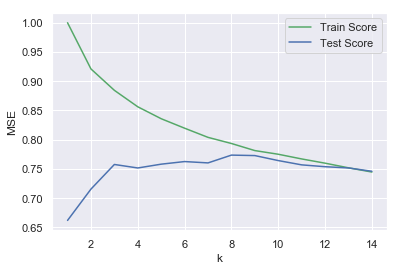

In [45]:
from sklearn.neighbors import KNeighborsRegressor


%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

### We choose k=10 since Test score is high at this point and also Train score is close enough to the test score

In [86]:
    knn_reg = KNeighborsRegressor(8)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))
    print(knn_reg.score(X_train, y_train))
    print(knn_reg.score(X_test, y_test))

0.7935658886835638
0.7736985115422275


## Cross validation for KNN regressor

In [89]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_reg, X_train, y_train,cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.74715173 0.67141666 0.70057807 0.6995324  0.75147307]


## Linear regression

In [115]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.8069460069646788
0.8174705414991206


## Cross validation for Linear regression


In [90]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lreg, X_train, y_train,cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.77118389 0.75735549 0.77144877 0.81054166 0.7483861 ]


Text(0.5, 0, 'Gr Living Area')

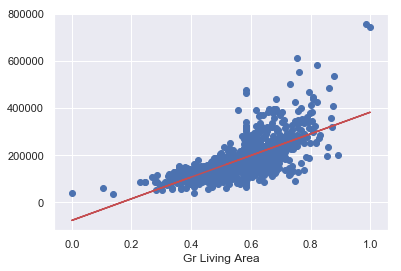

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_Gr = X_train[:,12].reshape(-1,1)
lreg.fit(X_train_Gr, y_train)
y_predict = lreg.predict(X_train_Gr)

plt.plot(X_train_Gr, y_predict, c = 'r')
plt.scatter(X_train_Gr,y_train)
plt.xlabel('Gr Living Area')

## SGD regression

In [50]:
np.random.seed(0)
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.8069174995736399
0.8176546137723463


In [51]:
sgd_reg.coef_

array([ 72198.31364326,  60079.3086787 , 162562.39438655,  53096.29411851,
       107772.73041364,  25940.02544937, -77709.9601558 ,  83741.26112773,
        16077.26153529,  49752.53862791,  83447.37525063,   1842.61525692,
       100936.49222211,   7989.33922462,  -7212.14866118,    979.22155792,
         1771.23321309, -48298.63366648,  24618.75816174,  -7520.87788598,
       -10771.84364406, -24803.27962865,  -1211.10014365,  -8865.96426966,
        -3356.87086939,  10294.35891907,  -8048.60601762,  -6842.55888309,
       -30158.63310722, -13544.37308066, -18296.79261747,  -8508.14155798,
       -38542.1431591 ,   5151.40250993, -16130.21712876])

In [52]:
sgd_reg.intercept_

array([-102625.73521344])

In [53]:
sgd_reg.n_iter_

100000

## Polynomial regression

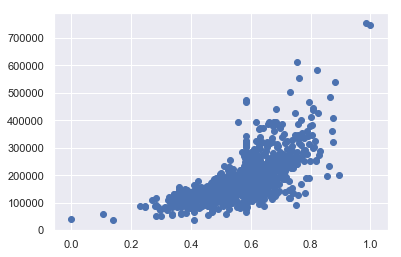

In [54]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,12].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [91]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    #polynomialFeatures is an unsupervised learning mode
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [92]:
print(train_score_list)
print(test_score_list)

[0.8069460069646789, 0.9311697322283583]
[0.8174705414991206, -6.825506280983647e+22]


#####  The dataset has lots of dummy variables. We know that with nonlinear regression, the R2 can be negative whenever the best-fit model (given the chosen equation, and its constraints, if any) fits the data worse than a horizontal line. Accordingly, Nonlinear model doesnt do a good job for this dataset

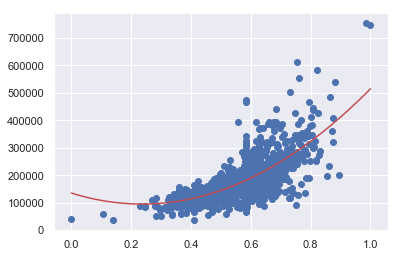

In [57]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,12].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

## Ridge

In [58]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

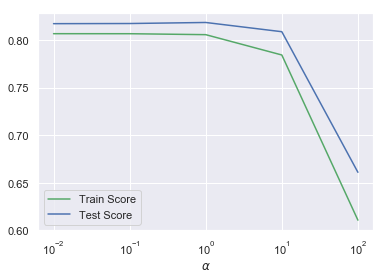

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [60]:
print(train_score_list)
print(test_score_list)

[0.8069456048464974, 0.8069193816130669, 0.8059229592359843, 0.7845467357115301, 0.6108355688611399]
[0.8174858840040411, 0.8176379265112508, 0.8187375775935479, 0.8090289156280881, 0.6611662377086089]


In [94]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8059
Test score: 0.8187


In [62]:
ridge.coef_

array([ 72217.81627704,  60085.95538252, 162589.5553708 ,  53111.76714965,
       107778.3196381 ,  25936.96878542, -77739.37395491,  83755.56699313,
        16075.66170093,  49742.15696289,  83489.16319083,   1849.6381981 ,
       100957.16795783,   7978.63011337,  -7225.08180358,    977.54606116,
         1763.63120899, -48370.37412825,  24619.22385064,  -7522.22345824,
       -10774.38220628, -24802.80529741,  -1211.37860983,  -8864.26253449,
        -3360.75003954,  10299.55693964,  -8048.64553925,  -6851.65206168,
       -30171.91937553, -13737.44830785, -18503.2256278 ,  -8716.1980612 ,
       -38825.31548456,   4955.00995402, -16122.8623614 ])

In [63]:
ridge.intercept_

-102413.07153681642

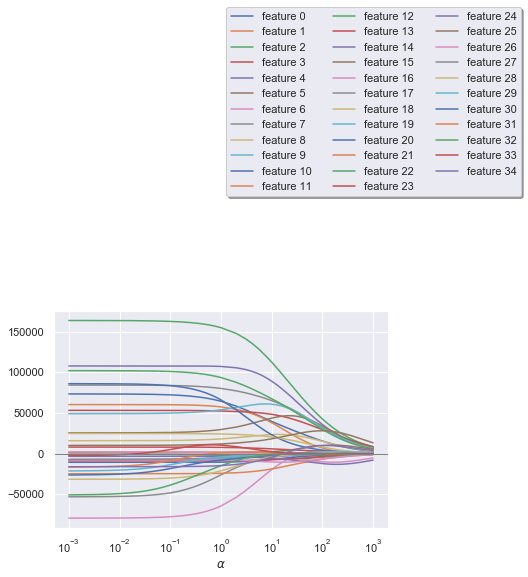

In [64]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,35):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=10000, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='best', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

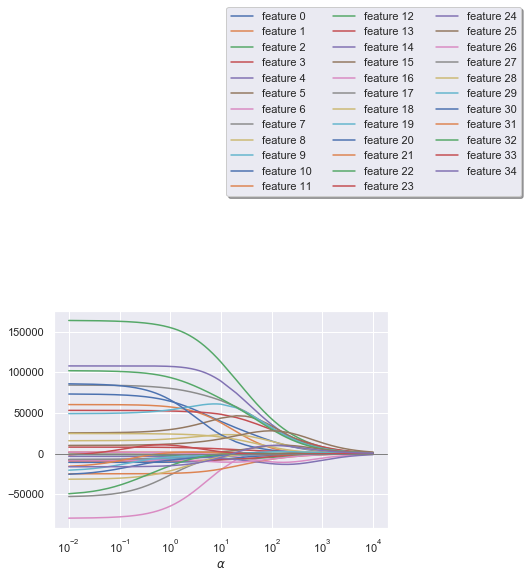

In [65]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.01, 10, 1000).reshape(-1,1)
x_range2 = np.linspace(10, 10000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,35):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=10000, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='best', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Lasso

In [67]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

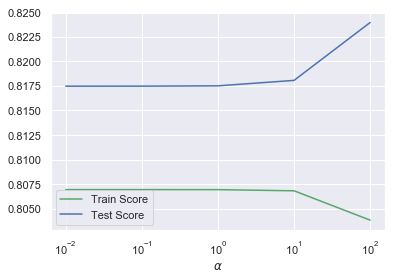

In [68]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

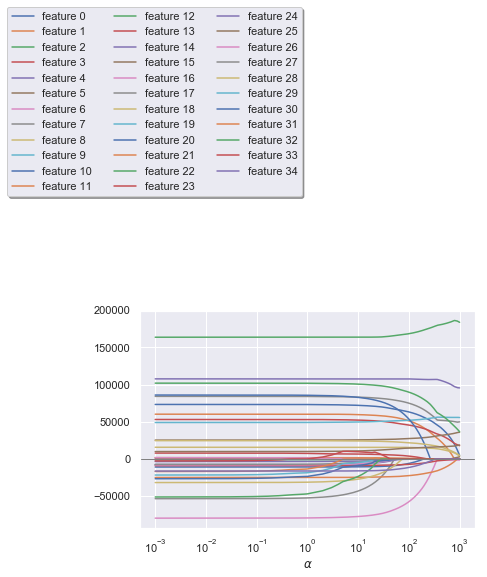

In [104]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,35):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='lower right', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [105]:
lasso.coef_

array([  4916.99370721,      0.        , 183776.51068747,  17963.25573936,
        95605.18688316,  36010.6951267 ,     -0.        ,  49948.78760095,
         3931.13490377,  55784.8366168 ,      0.        ,      0.        ,
        36728.16396271,      0.        ,     -0.        ,   2940.58333864,
        -1477.64108612,     -0.        ,   4901.24576104,      0.        ,
           -0.        ,     -0.        ,     -0.        ,     -0.        ,
           -0.        ,  18875.34839217,     -0.        ,      0.        ,
           -0.        ,      0.        ,     -0.        ,      0.        ,
           -0.        ,     -0.        ,      0.        ])

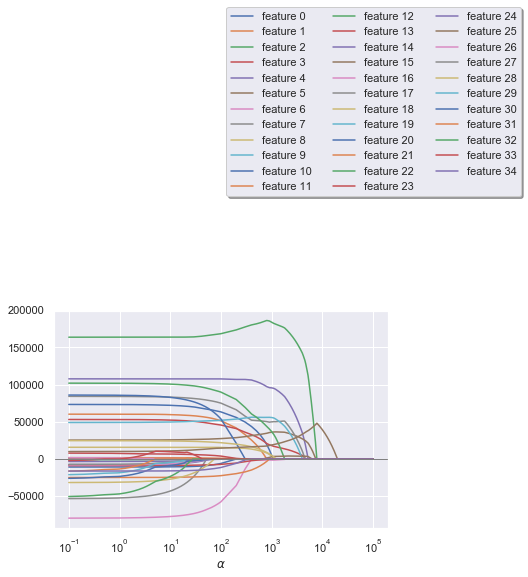

In [102]:
%matplotlib inline

x_range1 = np.linspace(0.1, 100, 1000).reshape(-1,1)
x_range2 = np.linspace(100, 100000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,35):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='best', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## SVM Regression

### SVM RBF

In [107]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf',C=10000,epsilon=0.1,shrinking=True,cache_size=200,)
svr_rbf.fit(X_train,y_train)
print(svr_rbf.score(X_train, y_train))
print(svr_rbf.score(X_test, y_test))

C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.538377052475873
0.6000236225739203


### SVM Linear

In [108]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear',C=10000,epsilon=0.1,shrinking=True,cache_size=200,)
svr_lin.fit(X_train,y_train)
print(svr_lin.score(X_train, y_train))
print(svr_lin.score(X_test, y_test))

0.7479900251658944
0.7897966351344341


### SVM Poly

In [109]:
from sklearn.svm import SVR
svr_pol = SVR(kernel='poly',C=10000,epsilon=0.1,shrinking=True,cache_size=200,)
svr_pol.fit(X_train,y_train)
print(svr_pol.score(X_train, y_train))
print(svr_pol.score(X_test, y_test))

C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.08841017409447338
0.13143029954634766


## Grid search for Linear SVM

In [82]:
best_score = 0

for C in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]:
    for epsilon in [0.001, 0.01, 0.1, 1, 10, 100,1000, 10000]:
        # for each combination of parameters, train an SVC
        svm = SVR(epsilon=epsilon, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'epsilon': epsilon}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureW

C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureW

C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Alex\Anaconda3.7\lib\site-packages\sklearn\svm\base.py:196: FutureW

Best score: 0.81
Best parameters: {'C': 100000, 'epsilon': 10000}


<bound method RegressorMixin.score of SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)>

## Here is the table of the R squared achieved by different models in this project:

In [134]:
print('KNN train score: {:.5f}'.format(knn_reg.score(X_train, y_train)))
print('KNN test score: {:.5f}'.format(knn_reg.score(X_test, y_test)))
print('Linear Regression train score: {:.5f}'.format(lreg.score(X_train, y_train)))
print('Linear Regression test score: {:.5f}'.format(lreg.score(X_test, y_test)))
print('SGD Regression train score: {:.5f}'.format(sgd_reg.score(X_train, y_train)))
print('SGD Regression test score: {:.5f}'.format(sgd_reg.score(X_test, y_test)))
print('Ridge train score: {:.5f}'.format(ridge.score(X_train,y_train)))
print('Ridge test score: {:.5f}'.format(ridge.score(X_test, y_test)))
print('RBF SVM train score: {:.5f}'.format(svr_rbf.score(X_train, y_train)))
print('RBF SVM test score: {:.5f}'.format(svr_rbf.score(X_test, y_test)))
print('Linear SVM train score: {:.5f}'.format(svr_lin.score(X_train, y_train)))
print('Linear SVM test score: {:.5f}'.format(svr_lin.score(X_test, y_test)))
print('Poly SVM train score: {:.5f}'.format(svr_pol.score(X_train, y_train)))
print('Poly SVM test score: {:.5f}'.format(svr_pol.score(X_test, y_test)))

KNN train score: 0.79357
KNN test score: 0.77370
Linear Regression train score: 0.80695
Linear Regression test score: 0.81747
SGD Regression train score: 0.80692
SGD Regression test score: 0.81765
Ridge train score: 0.80592
Ridge test score: 0.81874
RBF SVM train score: 0.53838
RBF SVM test score: 0.60002
Linear SVM train score: 0.74799
Linear SVM test score: 0.78980
Poly SVM train score: 0.08841
Poly SVM test score: 0.13143


In [116]:
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.8069460069646788
0.8174705414991206


In [137]:
import pandas as pd 
  
# intialise data of lists. 
data = {'Model':['KNN', 'Linear Regression', 'SGD regression','Ridge', 'SVM (RBF)','SVM (Linear)','SVM (Poly)'], 'Train Score':[0.7936, 0.8069,0.8069, 0.8059, 0.5384,0.7480,0.0884],'Test Score':[0.7737,
0.8175,0.8177,0.8187 ,0.6000,0.7898,0.1314],'Best hyper parameter':['8 nearest neighbour','NA','learning_rate = optimal, penalty = l2','alpha = 1','C=10000,epsilon=0.1','C=10000,epsilon=0.1','C=10000,epsilon=0.1']} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
print(df) 

               Model  Train Score  Test Score  \
0                KNN       0.7936      0.7737   
1  Linear Regression       0.8069      0.8175   
2     SGD regression       0.8069      0.8177   
3              Ridge       0.8059      0.8187   
4          SVM (RBF)       0.5384      0.6000   
5       SVM (Linear)       0.7480      0.7898   
6         SVM (Poly)       0.0884      0.1314   

                    Best hyper parameter  
0                    8 nearest neighbour  
1                                     NA  
2  learning_rate = optimal, penalty = l2  
3                              alpha = 1  
4                    C=10000,epsilon=0.1  
5                    C=10000,epsilon=0.1  
6                    C=10000,epsilon=0.1  


In [144]:
from tabulate import tabulate

print(tabulate(df, headers='keys', tablefmt='psql'))

+----+-------------------+---------------+--------------+---------------------------------------+
|    | Model             |   Train Score |   Test Score | Best hyper parameter                  |
|----+-------------------+---------------+--------------+---------------------------------------|
|  0 | KNN               |        0.7936 |       0.7737 | 8 nearest neighbour                   |
|  1 | Linear Regression |        0.8069 |       0.8175 | NA                                    |
|  2 | SGD regression    |        0.8069 |       0.8177 | learning_rate = optimal, penalty = l2 |
|  3 | Ridge             |        0.8059 |       0.8187 | alpha = 1                             |
|  4 | SVM (RBF)         |        0.5384 |       0.6    | C=10000,epsilon=0.1                   |
|  5 | SVM (Linear)      |        0.748  |       0.7898 | C=10000,epsilon=0.1                   |
|  6 | SVM (Poly)        |        0.0884 |       0.1314 | C=10000,epsilon=0.1                   |
+----+--------------

>According to the resutls, SGD regression shows the best perofrmance. Its train score is maximum and the test score is almost the best.